<a href="https://colab.research.google.com/github/dnicalek/BostonHousing/blob/main/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Loading data from file

In [14]:
def load_data(file_path):
    # Loading the dataset using pandas
    bh_data = pd.read_csv(file_path, sep=';')
    # Splitting data into features and target variable
    X, y = bh_data.values[:, :-1], bh_data.values[:, -1]
    return X, y

Removing outliers from the training set

In [2]:
def remove_outliers(X, y):
    outliers = np.abs((y - y.mean()) / y.std()) > 3
    X_no_outliers = X[~outliers, :]
    y_no_outliers = y[~outliers]
    y_mean = y.copy()
    y_mean[outliers] = y.mean()
    return X_no_outliers, y_no_outliers, y_mean

Training the model on the training data with outliers replaced by mean


In [18]:
def train_linear_regression(X_train, y_train):
    linReg = LinearRegression()
    linReg.fit(X_train, y_train)
    return linReg

Visualizing the weights of each feature using a bar plot

In [4]:
def visualize_weights(weights, feature_names):
    fig, ax = plt.subplots(1, 1)
    x = np.arange(len(feature_names))
    ax.bar(x, weights)
    ax.set_xticks(x)
    ax.set_xticklabels(feature_names, rotation=90)
    ax.set_ylabel('Weights')
    ax.set_title('Weights of Features in Linear Regression Model')
    ax.grid(axis='y')
    plt.tight_layout()
    plt.show()

Calculating the correlation matrix and creating a heatmap

In [5]:
def plot_correlation_heatmap(data, target_col):
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Sort the correlation with respect to the target column
    correlation_with_target = correlation_matrix[target_col].sort_values(ascending=False)

    # Drop the target column from the correlation matrix
    correlation_matrix = correlation_matrix.drop(target_col, axis=1)
    correlation_matrix = correlation_matrix.drop(target_col, axis=0)

    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

Plotting histograms

In [44]:
def plot_histograms(data):
    # Get the target column name
    target_column = data.columns[-1]

    # Plot histogram for the target (house prices)
    plt.figure(figsize=(8, 6))
    plt.hist(data[target_column], bins=30, color='blue', edgecolor='black')
    plt.xlabel('House Price')
    plt.ylabel('Frequency')
    plt.title('Histogram of House Prices')
    plt.grid(True)
    plt.show()


    # Plot histograms for each feature
    feature_columns = data.columns[:-1]
    num_features = len(feature_columns)
    fig, axes = plt.subplots(num_features, 1, figsize=(8, 6*num_features), sharex=False)

    for i, feature in enumerate(feature_columns):
        axes[i].hist(data[feature], bins=30, color='green', edgecolor='black')
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()





Evaluation of the model

In [8]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Absolute Percentage Error: {mape}')

  Loading dataset

In [15]:
file = 'housing.csv'  # Replace with the correct name of file with path
bh_data = pd.read_csv(file, sep=';')
X, y = load_data(file)

In [16]:
bh_data.head(10)

,Przestepczosc,Mieszkaniowa,Niemieszkaniowa,PrzyRzece,TlenkiAzotu,LPokojow,WiekMieszkan,OdleglOdCentrow,DostDoMetra,Podatki,NauczUczen,AfrAmer,PracFiz,MedianowaCena
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [17]:
bh_data.describe()

,Przestepczosc,Mieszkaniowa,Niemieszkaniowa,PrzyRzece,TlenkiAzotu,LPokojow,WiekMieszkan,OdleglOdCentrow,DostDoMetra,Podatki,NauczUczen,AfrAmer,PracFiz,MedianowaCena
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=221)
# Removing outliers
X_train_no_outliers, y_train_no_outliers, y_train_mean = remove_outliers(X_train, y_train)
# Initializing and training the linear regression model
linReg = train_linear_regression(X_train_no_outliers, y_train_mean)


In [20]:
# Get the feature names
bh_features = bh_data.columns.to_list()
independent_features = bh_features[:-1]

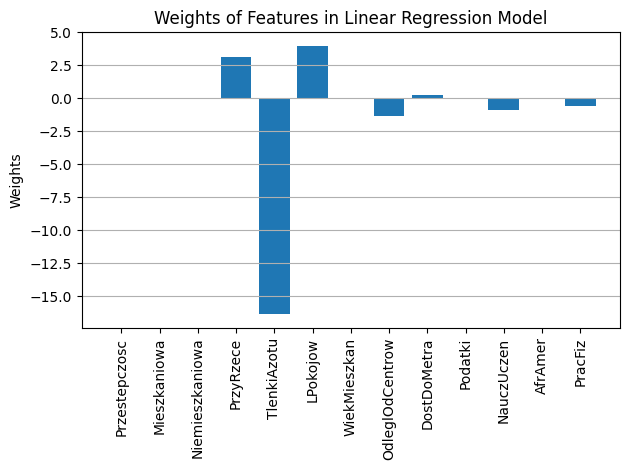

In [21]:
visualize_weights(linReg.coef_, independent_features)

Evaluation of the model on the test set

In [22]:
evaluate_model(linReg, X_test, y_test)

Mean Squared Error: 22.986805301605035
Mean Absolute Error: 3.2823591527593217
Mean Absolute Percentage Error: 0.17628301189775528


Plotting the correlation heatmap

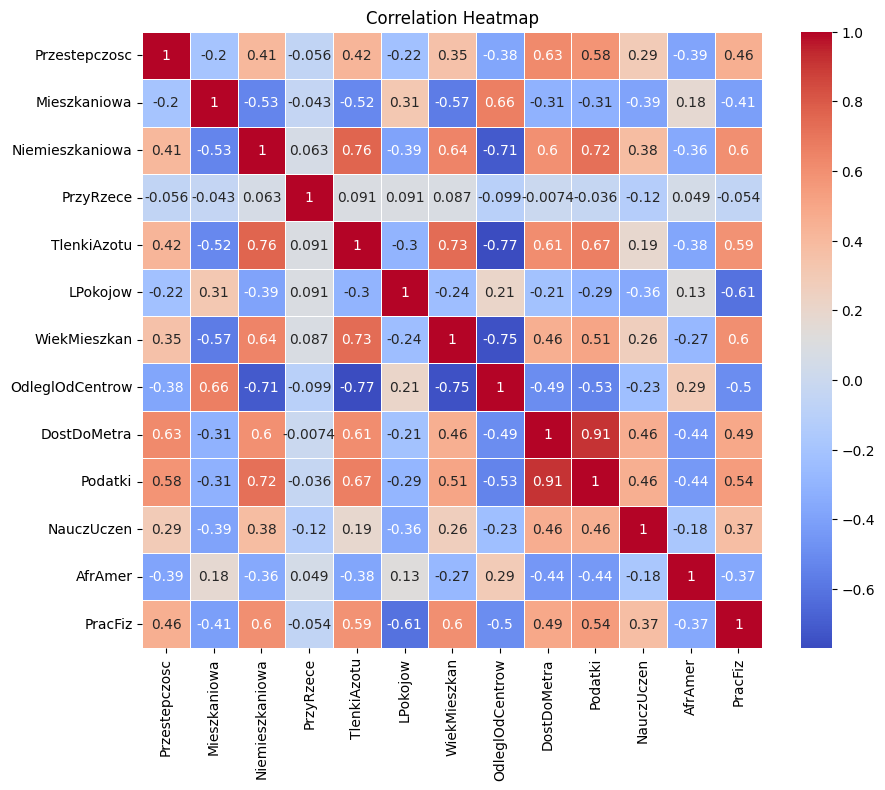

In [23]:
target_column = bh_data.columns[-1]
plot_correlation_heatmap(bh_data, target_column)


Plotting histograms

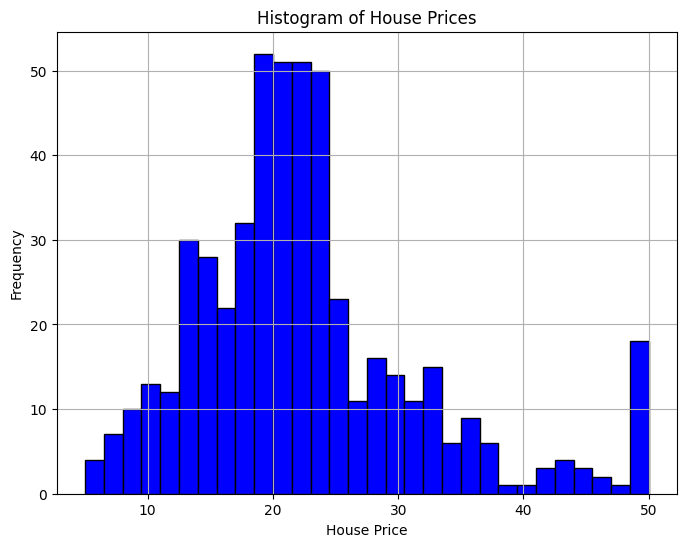

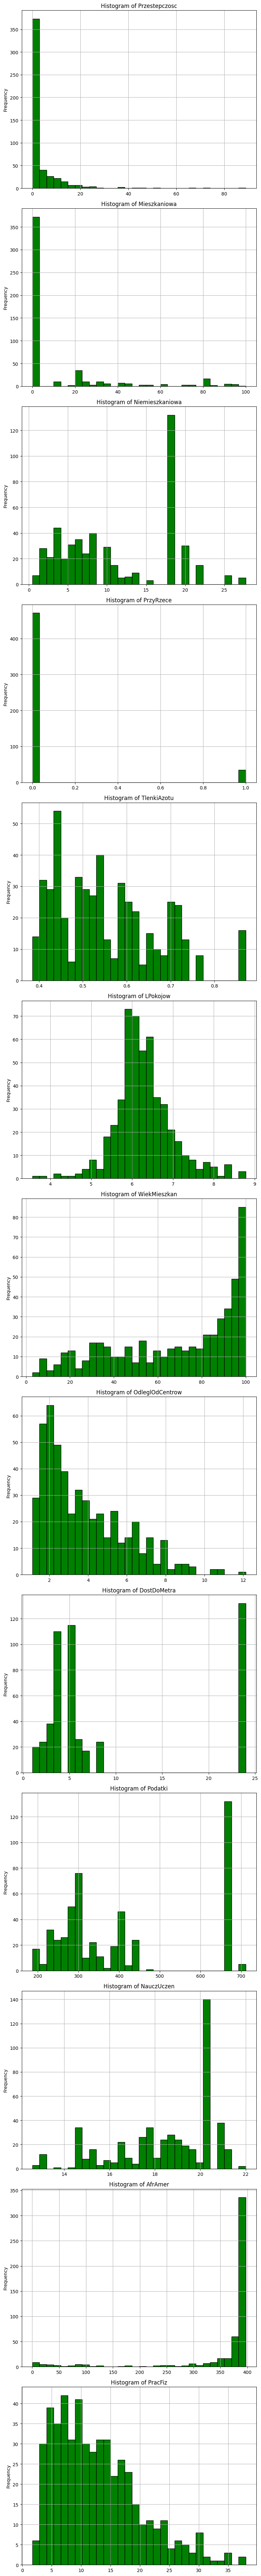

In [45]:
plot_histograms(bh_data)